# Notebook Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist

## Preload the Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Building the Neural Network

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

## Building the Model 

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Training and evaluating the model

In [7]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7034 - accuracy: 0.7691 - val_loss: 0.4953 - val_accuracy: 0.8290
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4852 - accuracy: 0.8310 - val_loss: 0.4646 - val_accuracy: 0.8340
Epoch 3/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4420 - accuracy: 0.8461 - val_loss: 0.4086 - val_accuracy: 0.8614
Epoch 4/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4175 - accuracy: 0.8539 - val_loss: 0.4388 - val_accuracy: 0.8446
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3976 - accuracy: 0.8597 - val_loss: 0.3968 - val_accuracy: 0.8584
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3820 - accuracy: 0.8659 - val_loss: 0.4332 - val_accuracy: 0.8458
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3694 - accuracy: 0.8698 - val_loss: 0.3690 - val_accuracy:

## Visualization of Model

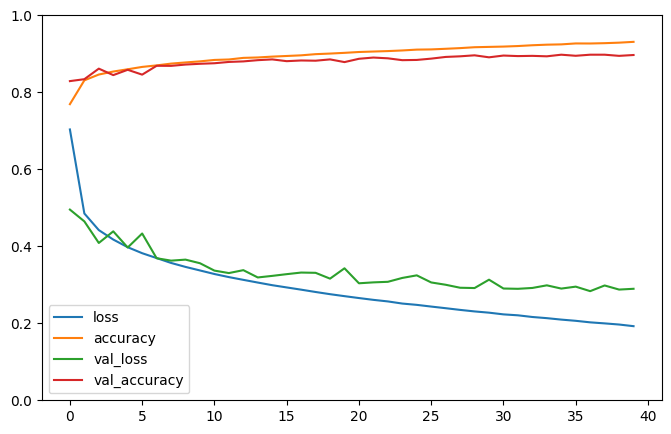

In [8]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1) 
plt.show()